<a href="https://colab.research.google.com/github/cu-applied-math/appm-4600-numerics/blob/lab_solutions/Labs/Lab05_FixedPt_RootFinding_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5: Fixed Point iteration and Rootfinding
# SOLUTIONS

There are **two parts** to this lab: fixed point iterations and root-finding with Newton's method. See below for details

#### Learning Objectives
1. Learn how to use and interpret a cobweb plot
1. See that the fixed point iteration doesn't always work
2. Predict which of the fixed point formulations will converge (hint: plot their deriviative)
3. Check your predictions with the cobweb plot
4. See that Newton's method doesn't always work
5. Practice implementing robust methods, e.g., ones that check for convergence, and return useful status flags to the user


Copyright 2025, Department of Applied Mathematics, University of Colorado Boulder. Released under the BSD 3-Clause License

In [1]:
from matplotlib import pyplot as plt

## Part 1: Fixed point iterations (and cobweb plots)

See [cobweb plot on wikipedia](https://en.wikipedia.org/wiki/Cobweb_plot), sometimes called a spider diagram

You can plot these via Python, but to make them nice and interactive is a bit of work (`matplotlib.animation.FuncAnimation` can do it, but you have to be quite proficient with Python and matplotlib).

For this demo, I recommend that you use [this geogebra online cobweb plot](https://www.geogebra.org/m/uvsfvNDt) or one of the varios Desmos apps (e.g., [Logistic Function Cobweb Diagram](https://www.desmos.com/calculator/ktsps2nrhi)) which are quite simple and runs on most modern web browsers.

We'll look at 5 different fixed-point reformulations of the same root-finding problem
$$f(x) = x^3 + 4x^2 - 10, \text{ find } f(x)=0$$
within the interval $[1,2]$

We'll convert it to a fixed point equation $$g(x)=x$$ for:
$$\begin{aligned}
g_1(x) &= x - x^3 - 4x^2+10\\\\
g_2(x) &= \sqrt{\frac{10}{x}-4x}\\\\
g_3(x) &= \frac{1}{2}\sqrt{10-x^3}\\\\
g_4(x) &= \sqrt{\frac{10}{4+x}}\\\\
g_5(x) &= x - \frac{x^3+4x^2-10}{3x^2+8x}
\end{aligned}
$$
If we know that the root is positive, then all of these $g$ functions should have a fixed point at a root of $f$ (you can double-check this yourself!)

These are in the Burden and Faires book in Table 2.2.

### Task
1. First, run a standard root-finding method from scipy (e.g., `scipy.optimize.root_scalar`) to find the value of the root in $[1,2]$
2. Then, for each of the five variations,
    - convince yourself via algebraic manipulations that the fixed-point problem is equivalent to the root-finding problem
    - plot the fixed-point problem, i.e., $y=g_i(x)$ and $y=x$, and confirm visually that it looks like it has the same solution as the root-finding problem
    - find the max and min value of the derivative, $g_i$, over the interval $[1,2]$. This can be done either by hand or by graphing
    - using the cobweb plotting software of your choice, run the fixed point iteration for each variation, trying it for starting points of both $x_0=1$ and $x_0=2$.  Does it converge? Diverge? Cycle?

### Deliverables
Your PDF should have an image (a screenshot is fine) of the cobweb plot for one case where it diverges, and one case where it converges. Make sure it is clearly labeled which example and what starting point.

### Solutions

Note: students are not expected to have solutions that look like this. This is just one example of some work you can do

In [2]:
import numpy as np
from scipy.optimize import root_scalar
f = lambda x : x**3 + 4*x**2 - 10

# Find the root
root = root_scalar(f, bracket=[1,2])
print(root)

      converged: True
           flag: converged
 function_calls: 8
     iterations: 7
           root: 1.3652300134140969
         method: brentq


In [3]:
# Another way to find the root, since we have a polynomial
from numpy.polynomial import Polynomial
p = Polynomial([-10,0,4,1]) # note the order:  from smallest to greatest power
root = p.roots()
root = np.real_if_close(root[ np.isreal(root) ]) # take only real roots
print(root)


[1.36523001]


<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-4*x + 10/x)
<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.5*sqrt(10 - x**3)


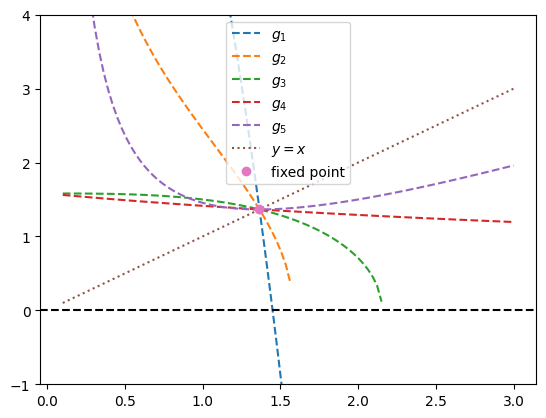

In [4]:
# Plot
import sympy
sympy.init_printing()
x = sympy.symbols('x')
g1         = x - x**3 - 4*x**2+10
g2         = sympy.sqrt( 10/x-4*x )
g3         = 1/2*sympy.sqrt(10-x**3)
g4         = sympy.sqrt(10/(4+x))
g5         = x - (x**3+4*x**2-10)/(3*x**2+8*x)
gList = [g1,g2,g3,g4,g5]

xGrid = np.linspace(0.1,3,num=100)
for i, g in enumerate(gList):
    g_numeric = sympy.lambdify(x,g) # for numerical evaluation
    plt.plot( xGrid, g_numeric(xGrid), '--', label=f'$g_{i+1}$')
plt.plot( xGrid, xGrid, ':', label='$y=x$')
plt.plot( root, root, 'o', label='fixed point')
plt.axhline(y=0, color='k', linestyle='--')
plt.ylim([-1,4])
plt.legend()
plt.show()

Check if $g$ maps $[1,2]$ into $[1,2]$. We can do this visually and symbolically

<lambdifygenerated-12>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-4*x + 10/x)


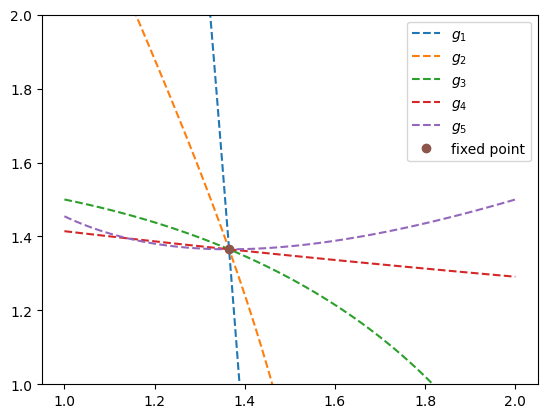

For g_1 on interval [1,2], min value is -12.0000000000000 and max value is 6.00000000000000
For g_2 on interval [1,2], min value is 0 and max value is 2.44948974278318
For g_3 on interval [1,2], min value is 0.707106781186548 and max value is 1.50000000000000
For g_4 on interval [1,2], min value is 1.29099444873581 and max value is 1.41421356237310
For g_5 on interval [1,2], min value is 1.36523001341410 and max value is 1.50000000000000


In [6]:
xGrid = np.linspace(1,2,num=100)
for i, g in enumerate(gList):
    g_numeric = sympy.lambdify(x,g) # for numerical evaluation
    plt.plot( xGrid, g_numeric(xGrid), '--', label=f'$g_{i+1}$')
plt.plot( root, root, 'o', label='fixed point')
plt.ylim([1,2])
plt.legend()
plt.show()

gList = [g1,g2,g3,g4,g5]
for i, g in enumerate(gList):
    mn = sympy.minimum( g, x, sympy.Interval(1,2) ).evalf()
    mx = sympy.maximum( g, x, sympy.Interval(1,2) ).evalf()
    print(f"For g_{i+1} on interval [1,2], min value is {mn} and max value is {mx}")

Results:
- $g_1$ does NOT map $[1,2]$ into $[1,2]$
- $g_2$ does NOT map $[1,2]$ into $[1,2]$
- $g_3$ does NOT map $[1,2]$ into $[1,2]$, though it's close! If we restricted the domain to $[1,1.5]$ then it does map $[1,1.5]$ into $[1,1.5]$
- $g_4$ *does* map $[1,2]$ into $[1,2]$
- $g_5$ *does* map $[1,2]$ into $[1,2]$

Now onto our second check: are we a contraction? i.e., check if
$$\max_{x\in[0,1]}\,|g'(x)| < 1 $$

Again, we can do this via plotting or via a rigorous analytic method (with some help from sympy)

In [7]:
# Check the bounds on the derivatives. We want it to be in (-1,1), i.e., |g'(x)| < 1
# We see that only g4 and g5 satisfy this
gList = [g1,g2,g3,g4,g5]
for i, g in enumerate(gList):
    deriv = sympy.diff(g,x)
    mn = sympy.minimum( deriv, x, sympy.Interval(1,2) ).evalf()
    mx = sympy.maximum( deriv, x, sympy.Interval(1,2) ).evalf()
    print(f"For g'_{i+1} on interval [1,2], min value is {mn} and max value is {mx}")

For g'_1 on interval [1,2], min value is -27.0000000000000 and max value is -10.0000000000000
For g'_2 on interval [1,2], min value is -oo and max value is -2.82868888288256
For g'_3 on interval [1,2], min value is -2.12132034355964 and max value is -0.250000000000000
For g'_4 on interval [1,2], min value is -0.141421356237310 and max value is -0.107582870727984
For g'_5 on interval [1,2], min value is -0.578512396694215 and max value is 0.357142857142857


In [ ]:
# Students should look at cobweb plots using some software.
# For this solution notebook, we'll just look at what happens with the fixed point iteration
def fixedPointIter( f, x0, maxIter=int(1e4), tol = 1e-6 ):
  p = np.array(x0,dtype=np.double) # cast any integers to floats, avoids some errors/warnings
  status = 'incomplete'
  for i in range(maxIter):
    p_old = p
    p = f(p)
    if np.isclose(p,p_old,atol=tol):
        status = 'converged'
        break
    if not np.isfinite(p):
        print(f'Diverged after {i+1} steps')
        status = 'diverged'
        break
  return p, status

for i, g in enumerate(gList):
    g_numeric = sympy.lambdify(x,g,'numpy') # for numerical evaluation
    p, flag1 = fixedPointIter( g_numeric, x0=1)
    er1 = np.abs(p-root)
    p, flag2 = fixedPointIter( g_numeric, x0=2)
    er2 = np.abs(p-root)
    print(f"For g_{i+1}, status of fixed pt iter (for x0=1 or 2) is {flag1} and {flag2}, errors {er1} and {er2}")


Diverged after 7 steps
Diverged after 7 steps
For g_1, status of fixed pt iter (for x0=1 or 2) is diverged and diverged, errors [nan] and [inf]
Diverged after 2 steps
Diverged after 1 steps
For g_2, status of fixed pt iter (for x0=1 or 2) is diverged and diverged, errors [nan] and [nan]
For g_3, status of fixed pt iter (for x0=1 or 2) is converged and converged, errors [3.2423284e-06] and [4.6407132e-06]
For g_4, status of fixed pt iter (for x0=1 or 2) is converged and converged, errors [1.62315399e-06] and [3.17803688e-07]
For g_5, status of fixed pt iter (for x0=1 or 2) is converged and converged, errors [2.12700968e-11] and [2.22044605e-16]


<lambdifygenerated-48>:2: RuntimeWarning: overflow encountered in scalar power
  return -x**3 - 4*x**2 + x + 10
<lambdifygenerated-48>:2: RuntimeWarning: invalid value encountered in scalar subtract
  return -x**3 - 4*x**2 + x + 10
<lambdifygenerated-49>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-4*x + 10/x)


**conclusion**
The fixed-point iteration with ...
- $g_1$ should fail in practice, and we had not theoretic guarantees since it's not a contraction on $[1,2]$
- Likewise, $g_2$ should fail
- $g_3$ may work in practice, though we didn't quite have theoretical guarantees (it's derivative's absolute value can be as larlge as $2.1$). This isn't a contradiction: our theory was sufficient to guarantee when it works, but it never said that it wouldn't work if the conditions didn't hold
- $g_4$ should work in practice, and our theory guarantees this
- $g_5$ should also work (and has theory to guarantee this), **and** it should work very well!  It's actually Newton's method in disguise!

## Part 2: Breaking Newton's Method

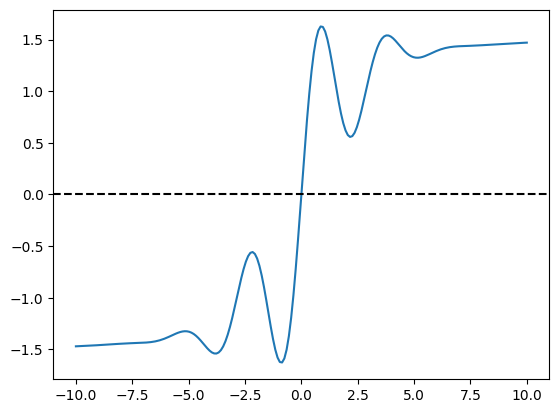

In [ ]:
import jax.numpy as jnp
from jax import grad
from jax import config
config.update("jax_enable_x64", True)
from scipy.special import lambertw as W

f = lambda x : jnp.arctan(x) + jnp.exp(-x**2/10)*jnp.sin(2*x)

xGrid = jnp.linspace(-10,10,200)
plt.plot( xGrid, f(xGrid), '-' )
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

### Task
1. Implement Newton's method
    - I've made a skeleton of some code for you below. Fill this in to implement Newton's method.
    - We'll use JAX to do automatic differentiation for us, so you don't even need to supply the derivative! But this does mean that your function must be defined using JAX functions (i.e., use `import jax.numpy as jnp` and then use `jnp...` instead of `np...`)
    - Make sure you have a **stopping condition**, and detect when the method **diverges**.  Return a useful **error message** that the user can look at.
    - Make sure your method works by running it on some root-finding problems where we know the answer.
2. For the function $f(x)=\arctan(x) + e^{-x^2/10}\sin(2x)$, which is plotted above, we want to find the root using Newton's method (spoiler alert: the root is $x=0$).
    - First, using the plot, visually draw out the first few iterations of Newton's method for a few different starting points.
    - Now, systematically test whether Newton's method converges for different starting points $x_0$. Choose a grid of $x_0$ locations consisting of 100 equally spaced points between $[-10,10]$ and for each $x_0$, run your Newton method code and see if it converges.  Check your error flag from your code!

### Deliverable
You should turn in a plot that shows for which starting points $x_0$ Newton's method converges (i.e., plot a $1$ at $x_0$ if it converged, and a $0$ if it failed to converge or diverged).

### Solutions
Again, your solutions need not look exactly like this

In [ ]:
import jax.numpy as jnp
from jax import grad
from jax import config
config.update("jax_enable_x64", True)
from scipy.special import lambertw as W

# First, convince yourself that code and algorithm are working
# by running the code on some problems where we can check our answer

# Very simple class, basically just a structure
class testProblem:
    def __init__(self, f, trueAnswer, name=None ):
        self.f = f
        self.trueAnswer = trueAnswer
        self.name = name

testProblemSuite = []

# One test problem
x = 15
f = lambda y : y*jnp.exp(y) - x
trueAnswer = jnp.real(W(x))
testProblemSuite.append( testProblem(f,trueAnswer,'Lambert W function') )

# Another test problem
# Let's figure out the square root of 13
f = lambda y : y**2 - 13
trueAnswer = jnp.sqrt(13)
testProblemSuite.append( testProblem(f,trueAnswer,'Square root of 13') )


def Newton(f,x0,fprime=None,maxSteps=100,errorFcn=None, tol = 1e-15, quiet=False):
    """ Newton method to solve f(x)=0, where fprime is the derivative
    of f. If fprime is not supplied, then the code will use JAX's
    Automatic Differentiation to automatically compute it.
    Starts Newton's method at the initial guess of x0. """
    if fprime is None:
        fprime = grad(f) # use JAX's autodiff
    x = jnp.array(x0,dtype=jnp.float64) # if it's an integer, convert to float
    status = 'incomplete'
    for i in range(maxSteps):
        step = f(x)/fprime(x)
        if not jnp.isfinite(step): # or: jnp.isinfinite(step) or jnp.isnan(step)
            if not quiet: print(f'Diverged after {i+1} steps')
            status = 'diverged'
            break
        if jnp.abs(step) < tol:
            if not quiet: print(f'Converged after {i} steps')
            status = 'converged'
            break
        x -= step
        if errorFcn is not None:
            if not quiet: print(f'Iter {i+1:2d}, {x=:16.9e}, {errorFcn(x)=:7.2e}')
    return x, status

for test in testProblemSuite:
    f = test.f
    trueAnswer = test.trueAnswer
    errFcn     = lambda x : jnp.abs(x - trueAnswer)
    print(f'=== Problem: {test.name}   ===')
    fprime = grad(f)
    x, status = Newton(f,.99,fprime, errorFcn = errFcn)
    print(status)
    print(x)
    print(trueAnswer)

=== Problem: Lambert W function   ===
Iter  1, x= 3.293341892e+00, errorFcn(x)=1.28e+00
Iter  2, x= 2.655983261e+00, errorFcn(x)=6.46e-01
Iter  3, x= 2.217650564e+00, errorFcn(x)=2.08e-01
Iter  4, x= 2.035939757e+00, errorFcn(x)=2.60e-02
Iter  5, x= 2.010387941e+00, errorFcn(x)=4.44e-04
Iter  6, x= 2.009943691e+00, errorFcn(x)=1.32e-07
Iter  7, x= 2.009943559e+00, errorFcn(x)=1.15e-14
Iter  8, x= 2.009943559e+00, errorFcn(x)=0.00e+00
Converged after 8 steps
converged
2.0099435593505657
2.0099435593505657
=== Problem: Square root of 13   ===
Iter  1, x= 7.060656566e+00, errorFcn(x)=3.46e+00
Iter  2, x= 4.450922556e+00, errorFcn(x)=8.45e-01
Iter  3, x= 3.685832677e+00, errorFcn(x)=8.03e-02
Iter  4, x= 3.606425583e+00, errorFcn(x)=8.74e-04
Iter  5, x= 3.605551381e+00, errorFcn(x)=1.06e-07
Iter  6, x= 3.605551275e+00, errorFcn(x)=1.78e-15
Iter  7, x= 3.605551275e+00, errorFcn(x)=0.00e+00
Converged after 7 steps
converged
3.605551275463989
3.605551275463989


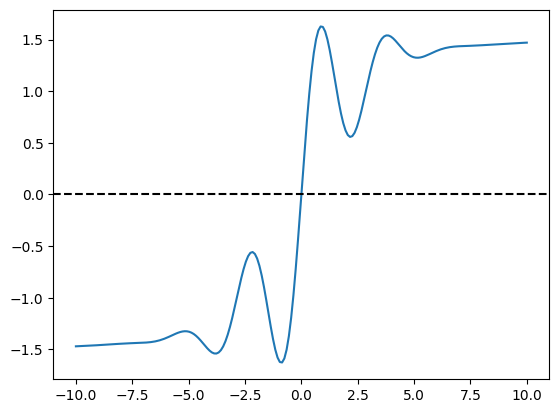

In [ ]:
# A quick plot
f = lambda x : jnp.arctan(x) + jnp.exp(-x**2/10)*jnp.sin(2*x)

xGrid = jnp.linspace(-10,10,200)
plt.plot( xGrid, f(xGrid), '-' )
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

In [ ]:
# Now let's make it diverge
# Make a plot of which initial conditions it converges for!
# So, make sure your code is robust... (do NOT rely on errorFcn)

errFcn = lambda x : jnp.abs(x-0) # the root is at zero
x, status = Newton(f,-.99, errorFcn = errFcn)
print(x)

Iter  1, x=-5.219897519e+00, errorFcn(x)=5.22e+00
Iter  2, x= 4.919904782e+01, errorFcn(x)=4.92e+01
Iter  3, x=-3.705344398e+03, errorFcn(x)=3.71e+03
Iter  4, x= 2.155896018e+07, errorFcn(x)=2.16e+07
Iter  5, x=-7.300884399e+14, errorFcn(x)=7.30e+14
Iter  6, x= 8.372801995e+29, errorFcn(x)=8.37e+29
Iter  7, x=-1.101188124e+60, errorFcn(x)=1.10e+60
Iter  8, x=1.904771633e+120, errorFcn(x)=1.90e+120
Iter  9, x=-5.699092506e+240, errorFcn(x)=5.70e+240
Diverged after 10 steps
-5.6990925064891924e+240


Now a systematic test: for which starting values $x_0$ does Newton's method converge?

In [ ]:
m = 100
x0grid = jnp.linspace(-10,10,m)
success = []
for x0 in x0grid:
    x, status = Newton(f,x0, quiet=True)
    success.append( status=='converged' )

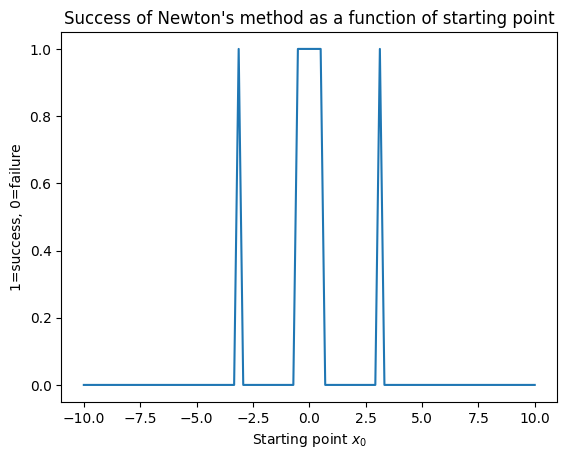

In [ ]:
plt.plot( x0grid, success )
plt.title("Success of Newton's method as a function of starting point")
plt.xlabel("Starting point $x_0$")
plt.ylabel("1=success, 0=failure")
plt.show()